In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [2]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "Yeast")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
t1.x

Processing...
Done!


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [3]:
t2 = tu_data[2]
G1 = to_networkx(t1, node_attrs=["x"], edge_attrs=["edge_attr"])
G2 = to_networkx(t2, node_attrs=["x"], edge_attrs=["edge_attr"])

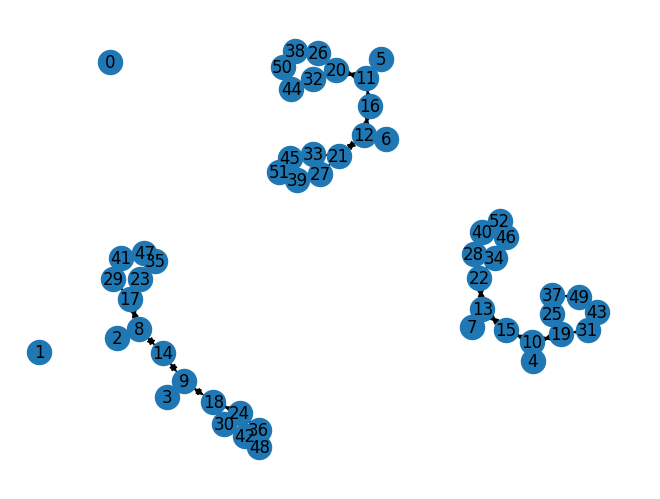

In [19]:
nx.draw(G1, with_labels = True)
plt.show()

In [21]:

# Convert the directed graph to an undirected copy for path finding
G_undirected = G1.copy()  # This creates an undirected copy

source = 8
target = 42

try:
  shortest_path = nx.shortest_path(G_undirected, source, target)
  distance = nx.shortest_path_length(G_undirected, source, target)
  print(f"Shortest path approximation (treating directed graph as undirected): {shortest_path}")
  print(f"Distance approximation: {distance}")
except NetworkXNoPath:
  print(f"No path found between {source} and {target}.")


Shortest path approximation (treating directed graph as undirected): [8, 14, 9, 18, 30, 42]
Distance approximation: 5


In [36]:
import networkx as nx

def directed_euclidean_heuristic(graph, source, target):
  """
  Custom heuristic function for A* search that penalizes going against edge directions.

  Args:
      graph: A NetworkX directed graph.
      source: Starting node for the A* search.
      target: Target node for the A* search.

  Returns:
      The estimated distance from the current node to the target node, considering edge directions.
  """
  # Calculate straight-line Euclidean distance as an initial estimate
  euclidean_distance = np.linalg.norm(np.array(graph.nodes[source]['pos']) - np.array(graph.nodes[target]['pos']))

  # Penalty factor for going against edge direction
  penalty_factor = 0.5  # Adjust this value based on your needs

  total_penalty = 0
  current_node = source

  while current_node != target:
    # Check if there's an edge going from current node to the next node in the shortest path
    if target not in graph.successors(current_node):
      # Penalize heavily if there's no outgoing edge towards the target
      total_penalty += penalty_factor * euclidean_distance
      break

    next_node = next(graph.successors(current_node))  # Get the first successor

    # Check if the edge direction is towards the target
    if graph.edges[current_node, next_node]['weight'] < 0:  # Assuming negative weight indicates going against direction
      total_penalty += penalty_factor * graph.edges[current_node, next_node]['weight']

    current_node = next_node

  # Combine straight-line distance with the penalty
  return euclidean_distance + total_penalty

# Example usage (assuming nodes have 'pos' attribute with position coordinates)
G = nx.DiGraph()
# ... (add nodes and edges with weights to your graph)

source = 0
target = 2

try:
  path = nx.astar_path(G, source, target, heuristic=directed_euclidean_heuristic)
  print(f"Path considering edge directions: {path}")
except NetworkXNoPath:
  print(f"No path found between {source} and {target}.")


NodeNotFound: Either source 0 or target 2 is not in G